Needed Libraries

In [7]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import imageio
from PIL import Image as Im
import os
from pathlib import Path

Selecting the key points on the pair of images which are the circular dots in the images. The selected pixels need to be consistent and in order on both images.


In [238]:
#loading data 
dataset_abs_path = r"C:\Users\k.hamad\Desktop\Dual Images\imageset_2\VNIR.png"  #Enter path
# print(dataset_abs_path)
file_name = "cube_envi32"
png_name = dataset_abs_path
H=np.load(r'C:\Users\k.hamad\Desktop\homographies.npy')


# Source: https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        pixels_clicked.append([x,y])
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +str(g) + ',' + str(r),(x,y), font, 1,(255, 255, 0), 2)
        cv2.imshow('image', img)
    
 

im1 = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_13\VNIR.png')                  # Read image
img = cv2.resize(im1, (im1.shape[1], int(im1.shape[0]/4)))   
cv2.imshow('image', img)

pixels_clicked = []
pixels_pos = cv2.setMouseCallback('image', click_event)

 # wait for a key to be pressed to exit
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()
print(pixels_clicked)
k_1=np.array(pixels_clicked)

im2 = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_13\SWIR.png')                  # Read image
img = cv2.resize(im2, (im2.shape[1], int(im2.shape[0]/4)))   
cv2.imshow('image', img)
pixels_clicked = []
pixels_pos = cv2.setMouseCallback('image', click_event)
 # wait for a key to be pressed to exit
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()
print(pixels_clicked)
k_2=np.array(pixels_clicked)
k_11=np.copy(k_1)
k_11[:,1]=k_11[:,1]*4
k_22=np.copy(k_2)
k_22[:,1]=k_22[:,1]*4

557   117
513   412
550   688
853   310
812   571
1104   114
1080   409
975   695
1181   250
1223   528
[[557, 117], [513, 412], [550, 688], [853, 310], [812, 571], [1104, 114], [1080, 409], [975, 695], [1181, 250], [1223, 528]]
161   255
134   550
155   823
333   453
308   714
477   256
522   395
467   550
400   833
544   673
[[161, 255], [134, 550], [155, 823], [333, 453], [308, 714], [477, 256], [522, 395], [467, 550], [400, 833], [544, 673]]


adding random value to the y-axis of the key point

In [80]:
n=1
k_22[:,1]=k_22[:,1]+n
k_11[:,1]=k_11[:,1]+n

removing the random value from the y-axis of the key point

In [336]:
n=8
k_22[:,1]=k_22[:,1]-n
k_11[:,1]=k_11[:,1]-n

adding random value to the x-axis of the key point

In [139]:
n=1
k_22[:,0]=k_22[:,0]+n
k_11[:,0]=k_11[:,0]+n

removing the random value from the x-axis of the key point

In [138]:
n=8
k_22[:,0]=k_22[:,0]-n
k_11[:,0]=k_11[:,0]-n

In [112]:
k_22

array([[ 114, 1060],
       [  92, 2480],
       [ 523, 1372],
       [ 564, 2696]])

In [172]:
k_22

array([[ 116, 1060],
       [  94, 2476],
       [ 521, 1376],
       [ 566, 2692]])

In [167]:
print(np.reshape(H1,(3,3))@np.array([116, 1060,1]))
print(np.reshape(H2,(3,3))@np.array([116, 1060,1]))
print(np.reshape(H1,(3,3))@np.array([116, 1060,1])-np.reshape(H2,(3,3))@np.array([116, 1060,1]))

[481.02585174 511.2182275    0.9985902 ]
[480.32189316 511.27818981   0.99859021]
[ 7.03958575e-01 -5.99623136e-02 -1.69532051e-08]


In [166]:
print(np.reshape(H1,(3,3))@np.array([  94, 2476,1]))
print(np.reshape(H2,(3,3))@np.array([  94, 2476,1]))
print(np.reshape(H1,(3,3))@np.array([  94, 2476,1])-np.reshape(H2,(3,3))@np.array([  94, 2476,1]))

[4.44185976e+02 1.92171539e+03 9.98834907e-01]
[4.43482705e+02 1.92175839e+03 9.98834921e-01]
[ 7.03270860e-01 -4.30007548e-02 -1.40105147e-08]


In [168]:
print(np.reshape(H1,(3,3))@np.array([   521, 1376,1]))
print(np.reshape(H2,(3,3))@np.array([   521, 1376,1]))
print(np.reshape(H1,(3,3))@np.array([   521, 1376,1])-np.reshape(H2,(3,3))@np.array([   521, 1376,1]))

[1.16833289e+03 7.98890811e+02 9.93715490e-01]
[1.16761579e+03 7.98947314e+02 9.93715565e-01]
[ 7.17098252e-01 -5.65029834e-02 -7.55727110e-08]


In [194]:
print(np.reshape(H1,(3,3))@np.array([   0, 0,1]))
print(np.reshape(H2,(3,3))@np.array([   0, 0,1]))
print(np.reshape(H1,(3,3))@np.array([   566, 2692,1])-np.reshape(H2,(3,3))@np.array([   566, 2692,1]))

[ 283.83247118 -535.904811      1.        ]
[ 283.13229369 -535.83225679    1.        ]
[ 7.18581495e-01 -4.07913043e-02 -8.23019003e-08]


In [174]:
print(np.reshape(H1,(3,3))@np.array([   93, 2,1])-np.reshape(H2,(3,3))@np.array([   2, 1,1]))

[ 1.55108000e+02 -5.09352428e+00 -1.09432379e-03]


In [202]:
np.reshape(H1,(3,3))@np.array([   0, 0,1])-np.reshape(H2,(3,3))@np.array([   0, 0,1])

array([ 7.00177493e-01, -7.25542136e-02,  1.11022302e-16])

In [192]:
np.array([(H1[0,0]*566+H1[0,1]*2692+H1[0,2])/((H1[2,0]*566+H1[2,1]*2692+H1[2,2])),(H1[1,0]*566+H1[1,1]*2692+H1[1,2])/((H1[2,0]*566+H1[2,1]*2692+H1[2,2]))])-np.array([(H2[0,0]*566+H2[0,1]*2692+H2[0,2])/((H2[2,0]*566+H2[2,1]*2692+H2[2,2])),(H2[1,0]*566+H2[1,1]*2692+H2[1,2])/((H2[2,0]*566+H2[2,1]*2692+H2[2,2]))])

array([ 0.72363726, -0.04089673])

In [195]:
np.array([(H2[0,0]*0+H2[0,1]*0+H2[0,2])/((H2[2,0]*0+H2[2,1]*0+H2[2,2])),(H2[1,0]*0+H2[1,1]*0+H2[1,2])/((H2[2,0]*0+H2[2,1]*0+H2[2,2]))])

array([ 283.13229369, -535.83225679])

In [213]:
from scipy.spatial import distance
from tqdm import tqdm

u=np.array([])
for y in tqdm(range(3500)):
    for x in range(648):
        a=H1@np.array([x,y,1])
        b=H2@np.array([x,y,1])
        u=np.append(u,distance.euclidean(a, b))

print(u)

100%|██████████| 3500/3500 [1:38:11<00:00,  1.68s/it]

[0.70392658 0.70395892 0.70399126 ... 0.72183258 0.72186501 0.72189744]


(array([ 1879.,  4826.,  7446.,  9837., 12014., 14072., 15991., 17806.,
        19559., 21208., 22809., 24346., 25653., 25870., 25864., 25859.,
        25873., 25853., 25865., 25868., 25857., 25864., 25862., 25866.,
        25861., 25857., 25869., 25868., 25847., 25875., 25856., 25862.,
        25866., 25855., 25874., 25864., 25856., 25864., 25856., 25875.,
        25860., 25853., 25875., 25851., 25868., 25863., 25852., 25871.,
        25865., 25854., 25869., 25858., 25868., 25865., 25848., 25874.,
        25857., 25860., 25868., 25862., 25863., 25857., 25855., 25873.,
        25860., 25860., 25864., 25856., 25868., 25861., 25855., 25868.,
        25865., 25857., 25864., 25853., 25869., 25866., 25861., 25860.,
        25857., 25867., 25863., 25851., 25871., 25860., 25853., 25741.,
        23317., 20399., 17792., 15426., 13236., 11184.,  9264.,  7423.,
         5687.,  4009.,  2409.,   863.]),
 array([0.70091306, 0.70115245, 0.70139183, 0.70163122, 0.7018706 ,
        0.70210999, 0.7023

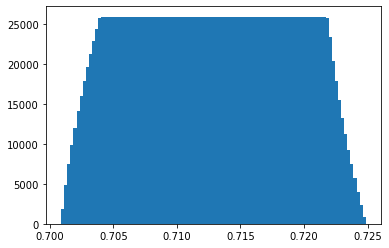

In [250]:
plt.hist(u,100)

In [252]:
from scipy.spatial import distance
dis=np.array([])
count=0
for i in tqdm(range(3500)):
    yy=np.ones((3,648))
    yy[0,:]=np.full(shape=648,fill_value=count,dtype=np.int) 
    yy[1,:]=np.arange(0,648)
    # np.sqrt(np.power((ok@yy)[]-ok1@yy,2)+np.power(ok@yy-ok1@yy,2)+np.power(ok@yy-ok1@yy,2))
    # sum_sq = np.sum(np.square((np.reshape(H1,(3,3))@yy).T - (np.reshape(H2,(3,3))@yy).T),axis=1)
    # dis=np.concatenate((dis,np.sqrt(sum_sq)),axis=0)
    sum_sq = np.sum(abs((np.reshape(H1,(3,3))@yy).T - (np.reshape(H2,(3,3))@yy).T),axis=1)
    dis=np.concatenate((dis,sum_sq),axis=0)
    count+=1


  0%|          | 0/3500 [00:00<?, ?it/s]c:\ProgramData\Anaconda3\envs\spice_env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
100%|██████████| 3500/3500 [00:09<00:00, 368.13it/s]


In [232]:
np.reshape(H3,(3,3))

array([ 1.75781350e+00,  5.28255860e-04,  2.79317295e+02, -1.93566390e-02,
        1.01359243e+00, -5.57753981e+02,  2.09341189e-05,  1.89104750e-06,
        1.00000000e+00])

(array([28447., 48369., 61903., 73305., 84368., 89172., 42055., 26636.,
        23788., 21099., 20466., 20467., 20466., 20468., 20467., 20464.,
        20468., 20468., 20466., 20466., 20467., 20466., 20468., 20466.,
        20466., 20467., 20468., 20465., 20467., 20467., 20467., 20466.,
        20467., 20467., 20466., 20466., 20467., 20467., 20467., 20466.,
        20466., 20467., 20468., 20466., 20466., 20468., 20466., 20466.,
        20467., 20467., 20467., 20465., 20467., 20467., 20467., 20467.,
        20465., 20467., 20469., 20465., 20466., 20468., 20466., 20467.,
        20467., 20466., 20467., 20467., 20466., 20467., 20466., 20467.,
        20466., 20466., 20469., 20465., 20466., 20468., 20466., 20468.,
        20466., 20466., 20467., 20467., 20466., 20467., 20467., 20466.,
        20466., 20467., 20468., 20467., 20424., 18564., 15718., 12871.,
        10023.,  7176.,  4330.,  1486.]),
 array([ 15.80514963,  19.60574229,  23.40633494,  27.2069276 ,
         31.00752026,  34.8081

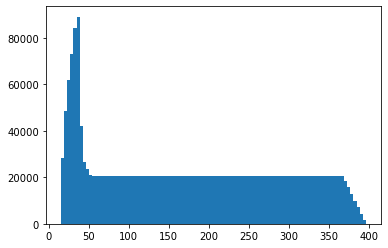

In [253]:
plt.hist(dis,100)

In [254]:
np.mean(dis)

177.3740696206634

finding the homography and applying RANSAC and warping the image

(3500, 1600, 3)


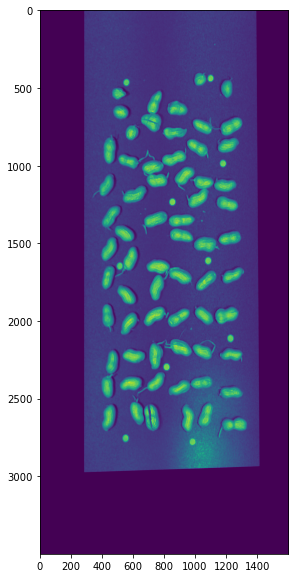

In [239]:
im1  = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_13\VNIR.png')
im2  = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_13\SWIR.png')
img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

h, mask = cv2.findHomography(k_22, k_11, cv2.RANSAC,5)
H2=h.flatten()
# Use homography
height, width, channels = im1.shape
print(im1.shape)
im1Reg = cv2.warpPerspective(img2, h, (width, height))  #Applies a perspective transformation to an image.

# print("Estimated homography : \n",  h)
fig,ax=plt.subplots(figsize=(20,10))
plt.imshow(im1Reg)

Finding the difference between 2 homographies. Need to change variable name from H1 to H2 in the above cell and run it again.

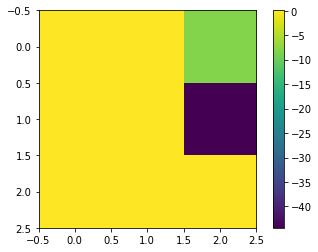

In [247]:
plt.imshow(np.reshape(H1-H2,(3,3)))
plt.colorbar()

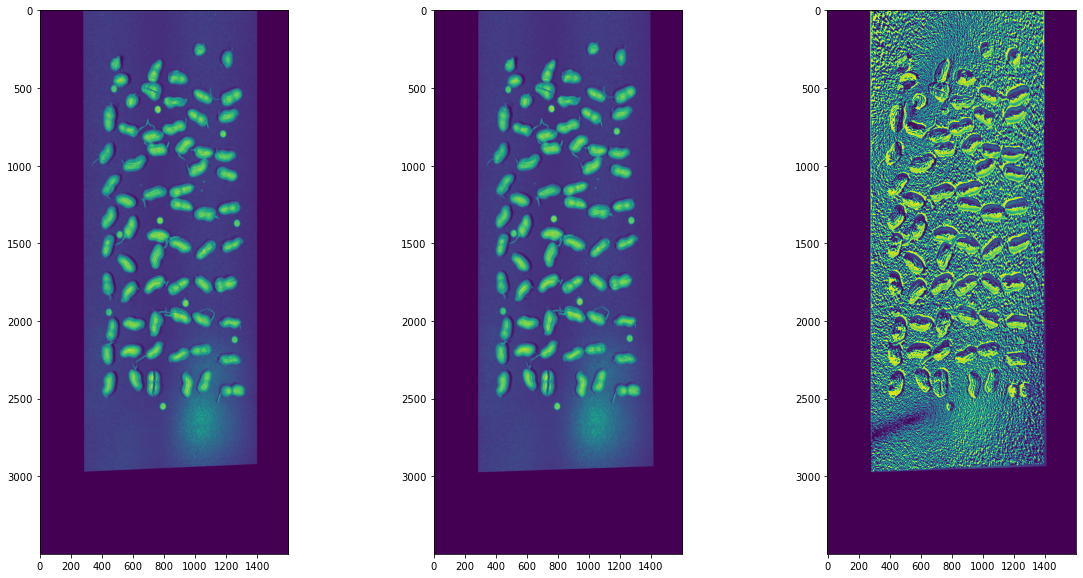

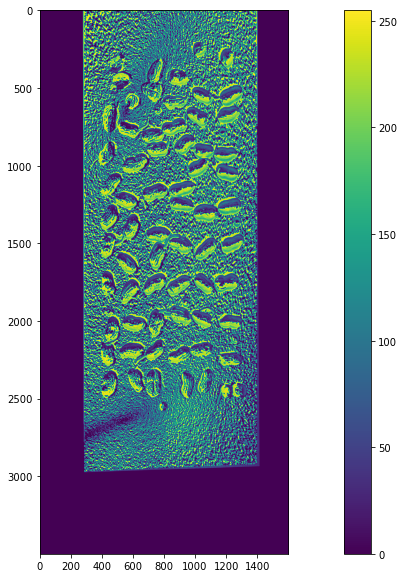

(3500, 1600, 3)
(3500, 648, 3)


In [246]:
im1  = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_12\VNIR.png')
im2  = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_12\SWIR.png')
img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
height, width, channels = im1.shape
im1Reg1 = cv2.warpPerspective(img2, np.reshape(H1,(3,3)), (width, height))
im1Reg2 = cv2.warpPerspective(img2, np.reshape(H2,(3,3)), (width, height))

sr=1
sl=4
su=1
sd=12

# im1Reg2=np.concatenate((im1Reg2[su:,:],np.zeros((su,1600))),axis=0)
# im1Reg2=np.concatenate((np.zeros((sd,1600)),im1Reg2[:-sd,:]),axis=0)
# im1Reg2=np.concatenate((np.zeros((3500,sr)),im1Reg2[:,:-sr]),axis=1)
# im1Reg2=np.concatenate((im1Reg2[:,sl:],np.zeros((3500,sl))),axis=1)
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(im1Reg1)
ax[1].imshow(im1Reg2) 
ax[2].imshow(abs(im1Reg2-im1Reg1))
plt.show()
fig,ax=plt.subplots(figsize=(20,10))
plt.imshow(abs(im1Reg2-im1Reg1))
plt.colorbar()
plt.show()
print(im1.shape)
print(im2.shape)

In [201]:
im1Reg1[0,284]

37

In [35]:
import sys


from scipy.linalg import norm
from scipy import sum, average
def compare_images(img1, img2):
    # normalize to compensate for exposure difference, this may be unnecessary
    # consider disabling it
    # img1 = normalize(img1)
    # img2 = normalize(img2)
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)
# img1 = to_grayscale(imread(file1).astype(float))
# img2 = to_grayscale(imread(file2).astype(float))
# compare
n_m, n_0 = compare_images(im1Reg1, im1Reg2)
print("Manhattan norm:", n_m, "/ per pixel:", n_m/im1Reg1.size)
print ("Zero norm:", n_0, "/ per pixel:", n_0*1.0/im1Reg2.size)

Manhattan norm: 30392326.0 / per pixel: 5.427201071428572
Zero norm: 2995189.0 / per pixel: 0.5348551785714286


c:\ProgramData\Anaconda3\envs\spice_env\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  del sys.path[0]


In [ ]:
from pixelmatch.contrib.PIL import pixelmatch
from PIL import Image

img_a = Image.open(r"C:\Users\k.hamad\Desktop\Dual Images\New folder\image_0 (2).png")
img_b = Image.open(r"C:\Users\k.hamad\Desktop\Dual Images\New folder\image_0 (2).png")
img_diff = Image.new("RGBA", img_a.size)

# note how there is no need to specify dimensions
mismatch = pixelmatch(img_a, img_b, img_diff, includeAA=True)

img_diff.save("diff.png")

In [67]:
# https://youtu.be/16s3Pi1InPU
"""
Comparing images using ORB/SIFT feature detectors
and structural similarity index. 
@author: Sreenivas Bhattiprolu
"""


from skimage.metrics import structural_similarity
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 30]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

# img00 = cv2.imread('images/monkey_distorted.jpg', 0)
# img01 = cv2.imread('images/monkey_rotated.jpg', 0)

# img1 = cv2.imread('images/BSE.jpg', 0)  # 714 x 901 pixels
# img2 = cv2.imread('images/BSE_noisy.jpg', 0)  # 714 x 901 pixels
# img3 = cv2.imread('images/BSE_smoothed.jpg', 0)  # 203 x 256 pixels
# img4 = cv2.imread('images/different_img.jpg', 0)  # 203 x 256 pixels

orb_similarity = orb_sim(im1Reg1, im1Reg2)  #1.0 means identical. Lower = not similar

print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
from skimage.transform import resize
# img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(im1Reg1, im1Reg2) #1.0 means identical. Lower = not similar
print("Similarity using SSIM is: ", ssim)

Similarity using ORB is:  0.9105691056910569
Similarity using SSIM is:  0.8400867252345943


5600000

In [371]:
np.unique(im1Reg1-im1Reg2)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [150]:
np.unique(im1Reg1-im1Reg2)

array([-50., -46., -45., -44., -43., -42., -41., -40., -39., -38., -37.,
       -36., -35., -34., -33., -32., -31., -30., -29., -28., -27., -26.,
       -25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,
        41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  69.,  72.,  75.,  77.,  78.])

In [73]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/watch?v=cA8K8dl-E6k


# Brute-Force Matching with ORB Descriptors

import numpy as np
import cv2
from matplotlib import pyplot as plt

# im1 = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\New folder\image_0 (2).png')          # Image that needs to be registered.
# im2 = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\New folder\image_0 (1).png') # trainImage

# img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# # Initiate ORB detector
# orb = cv2.ORB_create(50)  #Registration works with at least 50 points

# # find the keypoints and descriptors with orb
# kp1, des1 = orb.detectAndCompute(img1, None)  #kp1 --> list of keypoints
# kp2, des2 = orb.detectAndCompute(img2, None)

#Brute-Force matcher takes the descriptor of one feature in first set and is 
#matched with all other features in second set using some distance calculation.
# create Matcher object

# matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# # Match descriptors.
# matches = matcher.match(des1, des2, None)  #Creates a list of all matches, just like keypoints

# # Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)

#Like we used cv2.drawKeypoints() to draw keypoints, 
#cv2.drawMatches() helps us to draw the matches. 
#https://docs.opencv.org/3.0-beta/modules/features2d/doc/drawing_function_of_keypoints_and_matches.html
# Draw first 10 matches.
img3 = cv2.drawMatches(im1,k_11, im2, k_22, None)

cv2.imshow("Matches image", img3)
cv2.waitKey(0)

#Now let us use these key points to register two images. 
#Can be used for distortion correction or alignment
#For this task we will use homography. 
# https://docs.opencv.org/3.4.1/d9/dab/tutorial_homography.html

# Extract location of good matches.
# For this we will use RANSAC.
#RANSAC is abbreviation of RANdom SAmple Consensus, 
#in summary it can be considered as outlier rejection method for keypoints.
#http://eric-yuan.me/ransac/
#RANSAC needs all key points indexed, first set indexed to queryIdx
#Second set to #trainIdx. 

points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
   points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors

#Now we have all good keypoints so we are ready for homography.   
# Find homography
#https://en.wikipedia.org/wiki/Homography_(computer_vision)
  
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))  #Applies a perspective transformation to an image.
   
print("Estimated homography : \n",  h)

cv2.imshow("Registered image", im1Reg)
cv2.waitKey()

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'drawMatches'
> Overload resolution failed:
>  - drawMatches() missing required argument 'outImg' (pos 6)
>  - drawMatches() missing required argument 'outImg' (pos 6)
>  - drawMatches() missing required argument 'outImg' (pos 6)
>  - drawMatches() missing required argument 'outImg' (pos 6)
